In [1]:
import pandas as pd
import numpy as np

Load predictions of the model extended with gender and race probabilities

In [2]:
gender_race_preds = pd.read_csv(f"../model_checkpoints/amber-energy-136/meme_dev_seen_preds.csv")

Load dict with gender and race probabilities for each image

In [3]:
gender_race_probs_dict = pd.read_pickle("../dataset/gender_race_probs/dev_seen_gender_race_probs_dict.pickle")

Gender and race labels

In [4]:
gender_labels = ["female", "male"]
race_labels = ["asian", "indian", "black", "white", "middle eastern", "latino hispanic"]

Add dominant gender and race for each image

In [5]:
for i in gender_race_preds.index:
    probs = gender_race_probs_dict[gender_race_preds.at[i, "id"]]
    gender_probs = probs[:2]
    race_probs = probs[2:]
    if gender_probs[0]==0 and gender_probs[1]==0:
        gender_race_preds.at[i, "gender"] = "no face detected"
        gender_race_preds.at[i, "ethnicity"] = "no face detected"
    else:
        gender_race_preds.at[i, "gender"] = gender_labels[np.argmax(gender_probs)]
        gender_race_preds.at[i, "ethnicity"] = race_labels[np.argmax(race_probs)]

In [6]:
gender_race_preds = gender_race_preds[~(gender_race_preds["gender"] == "no face detected")]

In [7]:
gender_race_preds

,id,proba,label,gt,gender,ethnicity
0,8291,0.180453,0,1,male,black
1,46971,0.029385,0,1,male,white
2,3745,0.050819,0,1,female,white
5,5279,0.811795,1,1,male,white
6,1796,0.679784,1,1,female,asian
...,...,...,...,...,...,...
492,48792,0.204848,0,0,male,white
493,7528,0.894834,1,1,male,white
494,1268,0.531264,1,0,male,asian
495,83675,0.040106,0,0,male,black


In [8]:
num_gt_hateful = gender_race_preds[gender_race_preds["gt"]==1].shape[0]
num_label_hateful = gender_race_preds[gender_race_preds["label"]==1].shape[0]

gender_hateful_perc = gender_race_preds.groupby(by="gender")[["gt","label"]].sum()
gender_hateful_perc["gt"] = gender_hateful_perc["gt"] * 100/ num_gt_hateful
gender_hateful_perc["label"] = gender_hateful_perc["label"] * 100/num_label_hateful

ethnicity_hateful_perc = gender_race_preds.groupby(by="ethnicity")[["gt","label"]].sum()
ethnicity_hateful_perc["gt"] = ethnicity_hateful_perc["gt"] * 100/ num_gt_hateful
ethnicity_hateful_perc["label"] = ethnicity_hateful_perc["label"] * 100 /num_label_hateful
ethnicity_hateful_perc = ethnicity_hateful_perc.reindex(race_labels+["no face detected"])

In [9]:
gender_hateful_perc

,gt,label
gender,,
female,16.062176,17.808219
male,83.937824,82.191781


In [10]:
ethnicity_hateful_perc

,gt,label
ethnicity,,
asian,7.772021,9.589041
indian,2.590674,2.054795
black,17.098446,13.698630
white,58.031088,62.328767
middle eastern,10.362694,8.219178
latino hispanic,4.145078,4.109589
no face detected,NaN,NaN


In [11]:
hateful_perc = pd.concat([gender_hateful_perc, ethnicity_hateful_perc])

In [12]:
hateful_perc = hateful_perc.rename(columns = {"gt":"% actual hateful", "label":"% predicted hateful"})

In [13]:
pd.options.display.float_format = "{:,.2f}".format

In [14]:
print(hateful_perc.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  \% actual hateful &  \% predicted hateful \\
\midrule
female           &             16.06 &                17.81 \\
male             &             83.94 &                82.19 \\
asian            &              7.77 &                 9.59 \\
indian           &              2.59 &                 2.05 \\
black            &             17.10 &                13.70 \\
white            &             58.03 &                62.33 \\
middle eastern   &             10.36 &                 8.22 \\
latino hispanic  &              4.15 &                 4.11 \\
no face detected &               nan &                  nan \\
\bottomrule
\end{tabular}



In [74]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [75]:
import seaborn as sns

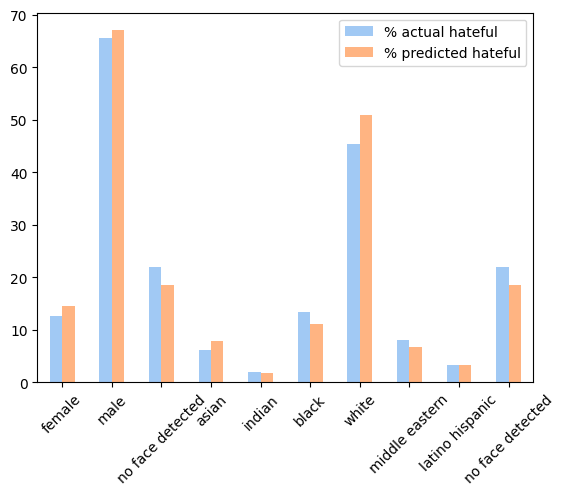

In [76]:
hateful_perc.plot(kind="bar", color=sns.color_palette("pastel"))
plt.xticks(rotation=45)
plt.show()